In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import Isomap, TSNE, MDS
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.neighbors import NearestNeighbors


In [7]:
data=pd.read_csv('train.csv')

In [8]:
df = data.drop(["type", "id", "uri", "track_href", "analysis_url", "song_name", "Unnamed: 0", "title", "duration_ms", "time_signature"], axis =1)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,Id
0,0.896,0.691,1,-7.403,1,0.3690,0.011800,0.000,0.0883,0.6650,189.880,Underground Rap,6863
1,0.432,0.962,2,-5.834,1,0.1300,0.001930,0.162,0.6300,0.1240,138.010,trance,30452
2,0.686,0.692,0,-5.573,0,0.3230,0.482000,0.000,0.1690,0.6490,173.780,Underground Rap,8111
3,0.441,0.891,7,-2.873,0,0.0370,0.017700,0.815,0.1840,0.0353,175.007,dnb,36665
4,0.376,0.876,4,-2.695,0,0.1010,0.034500,0.000,0.1250,0.2500,202.082,Dark Trap,4428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33839,0.855,0.586,6,-7.134,1,0.1670,0.200000,0.000,0.2530,0.7510,138.132,Underground Rap,6265
33840,0.760,0.726,0,-4.726,1,0.0652,0.057600,0.000,0.0514,0.8860,139.893,Trap Metal,11284
33841,0.464,0.838,8,-6.762,1,0.0401,0.000151,0.756,0.0671,0.1510,173.995,dnb,38158
33842,0.683,0.590,0,-4.949,1,0.3590,0.215000,0.000,0.1350,0.0401,209.986,Dark Trap,860


In [9]:
x = df.loc[:,:"tempo"]
y = df["genre"]

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
test_size= 0.2, random_state=42, shuffle = True)

In [11]:
col = xtrain.columns 
scalerx = MinMaxScaler() 
xtrain = scalerx.fit_transform(xtrain) 
xtest = scalerx.transform(xtest) 
xtrain = pd.DataFrame(xtrain, columns=col)  
xtest = pd.DataFrame(xtest, columns=col)

In [12]:
le = preprocessing.LabelEncoder()

ytrain = le.fit_transform(ytrain)

ytest = le.transform(ytest)

x = pd.concat([xtrain, xtest], axis= 0)

y = pd.concat([pd.DataFrame(ytrain), pd.DataFrame(ytest)], axis = 0)

y_train = le.inverse_transform(ytrain)

y_test = le.inverse_transform(ytest)

y_org = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], axis = 0)

np.unique(y_train)

array(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'], dtype=object)

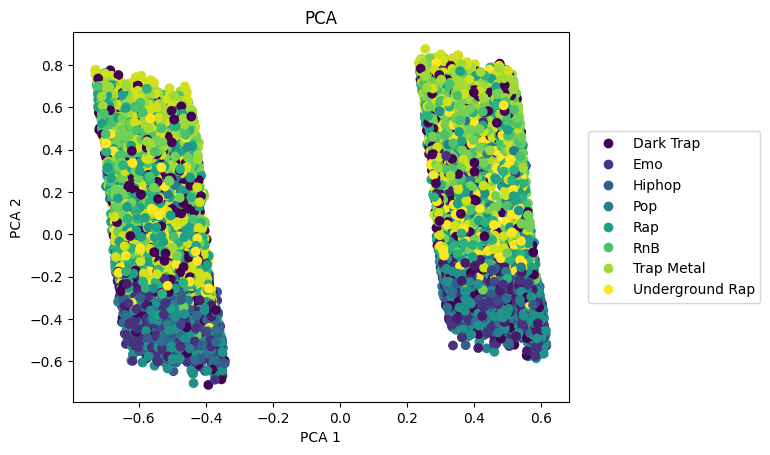

In [13]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x, y)
plot_pca = plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
handles, labels = plot_pca.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
_ = plt.title("PCA")

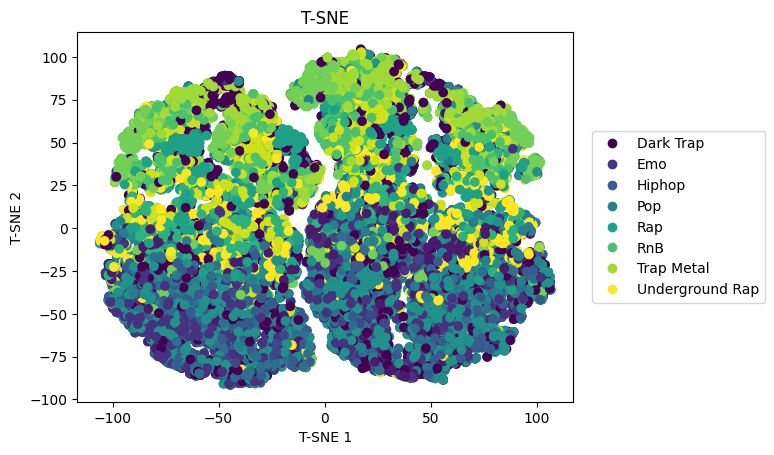

In [15]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x, y)
plot_tsne = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
handles, labels = plot_tsne.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")
_ = plt.title("T-SNE")

C:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


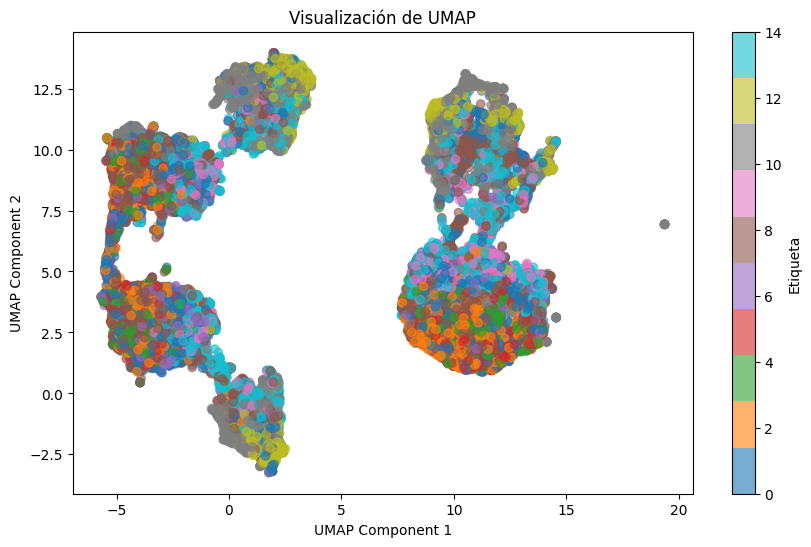

In [16]:
import umap

# Aplicar UMAP para reducir la dimensionalidad a 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
x_umap = umap_reducer.fit_transform(x)

# Visualización de los resultados de UMAP
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_umap[:, 0], x_umap[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Etiqueta')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("Visualización de UMAP")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Asegurar que y sea 1D
y_flat = y.values.ravel()  # Convierte y a un array de NumPy y lo aplana

# Calcular Silhouette Score usando las etiquetas reales
silhouette_pca = silhouette_score(x_pca, y_flat)
silhouette_tsne = silhouette_score(x_tsne, y_flat)
silhouette_umap = silhouette_score(x_umap, y_flat)

print("Silhouette Scores con etiquetas reales:")
print(f"PCA: {silhouette_pca:.4f}")
print(f"t-SNE: {silhouette_tsne:.4f}")
print(f"UMAP: {silhouette_umap:.4f}")



Silhouette Scores con etiquetas reales:
PCA: -0.1702
t-SNE: -0.1260
UMAP: -0.1611


## Conclusiones

En conclusión hemos realizado 3 técnicas diferentes de reducción de dimensionalidad para ver que técnica es más eficiente para agrupar los clusters. Como podemos ver en los resultados obtenidos, tenemos unos silhouette scores negativos con lo cual hay solapamiento entre clases. 

Respecto a las gráficas sacamos una conclusiones muy similares, no conseguimos ver una diferencia clara entre los grupos en ninguna de las 3 técnicas utilizadas. Por lo tanto, si tengo que quedarme con una de ellas en cuanto a eficiencia me quedo con PCA ya que tiene un inferencia muy diminuta (2 segundos) y me aporta resultados muy similares a T-SNE y UMAP que aunque tienen una ligera mejora en cuanto a la silhouette, su inferencia es más de 100 veces superior a PCA.

He probado alguna técnica de clustering como K-Means pero me daba problemas para ejecutarlo, por eso he obtado por estas 3.